In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
import jax


In [2]:
# setting hyperparameters
S = 10 # sessions
T = 500 # trials per session
N = T * S # total data points
C = 2 # classes
K = 1 # states
D = 2 # features (sensory & bias)

# True Transition Matrix
trueP = np.ones((1,1))
print("True Transition Matrix P")
print(trueP)

True Transition Matrix P
[[1.]]


Session indicies
[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


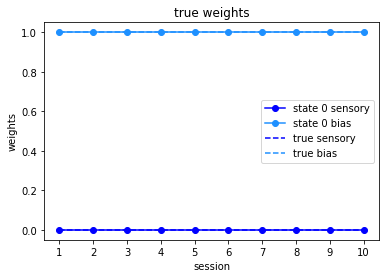

In [3]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = 0 # state 1 sensory (increasing)
ourW[:,0,0] = 1 # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,0] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)

plotting_weights(trueW, sessInd, trueW, 'true weights')


In [4]:
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
simX, simY, simZ = dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=False)

In [7]:
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
print(initW[0])

[[[-0.36194577  0.        ]
  [ 0.41189423  0.        ]]]


In [8]:
checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, sigma=reshapeSigma(.0001, K, D) , sessInd=sessInd, pi0=None, maxIter=10, tol=1e-3) # fit the model

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


In [ ]:
plotting_weights(checkW, sessInd, trueW, 'recovered')